# Distanced-Based Trajectory Interpolation
Here, we use sampled trajectories taken from `gym` and interpolate samples together according to their closest neighbors (excludes themselves). We interpolate using a simple averaging scheme between the two closest samples.

## Import Block

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import PIL
from IPython import display
from interpolated_replay_buffer import InterpolatedReplayBuffer
from metrics import Metrics

## Generate Trajectory From Gym

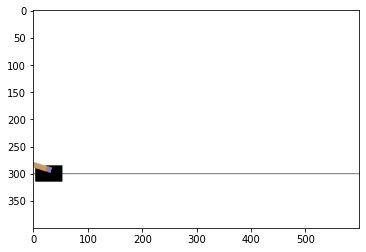

In [2]:
N_steps = 50

env = gym.make('CartPole-v1')
env.reset()
A = env.render(mode='rgb_array').astype(np.uint8)
img = plt.imshow(A) # only call this once
D = np.zeros(A.shape + (N_steps,)).astype(np.uint8)
for i in range(N_steps):
    
    #if bool(np.random.binomial(1, 0.1, 1)):
    #    env.reset()
    
    A = env.render(mode='rgb_array')
    D[..., i] = A
    img.set_data(A) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)

## Create IRB, Add Trajectory Generated by Gym, and Interpolate Trajectories

In [3]:
irb = InterpolatedReplayBuffer()
irb.get_trajectory(D)
irb.interpolate_trajectories()

## Gather Synthetic Samples from Synthetic Trajectories

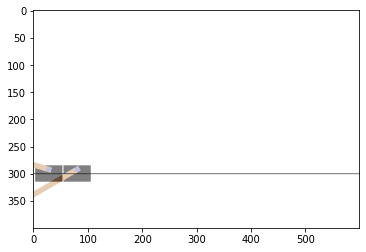

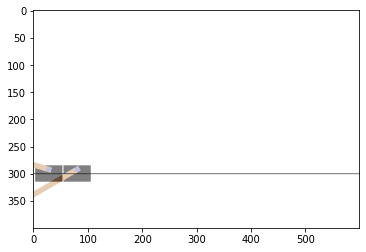

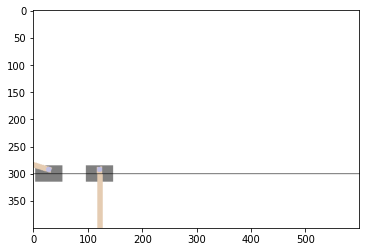

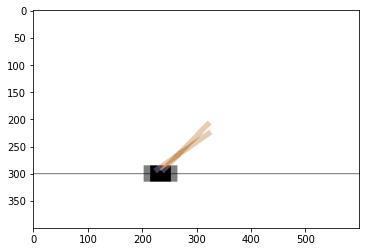

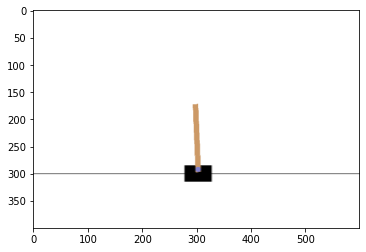

In [4]:
synthetic_samples = irb.sample_random_syn()
for i in range(5):
    plt.imshow(synthetic_samples[...,i])
    plt.show()